# Proyecto: Optimización de campañas de Marketing para una entidad bancaria

# Resumen

##Objetivo y contexto comercial

El objetivo de este proyecto es asesorar a una entidad bancaria en relación a sus campañas de marketing ya que recientemente realizó una para motivar a sus clientes a depositar ahorros a plazo fijo pero solo alcanzó solo al 10% de su cartera total de clientes.

Con el fin de mejorar la efectividad de las campañas de marketing, se quiere maximizar la tasa de conversión de las campañas, entendiendo los factores que influyen en esta tasa. Para ello, se busca desarrollar un modelo de clasificación que permita predecir qué clientes depositarían sus ahorros en un plazo fijo.

##Metadata

Para este trabajo, el banco ha proporcionado un archivo llamado clientes.csv, que contiene información sobre los 4521 clientes que fueron contactados durante la campaña anterior y se describen a continuación.

Datos clientes:
-    age: edad del cliente
-    job: tipo de trabajo
-    marital: estado civil
-    education: nivel de educación
-    default: indica si el cliente registra algún default crediticio
-    balance: saldo en dólares de la caja de ahorro del cliente
-    housing: indica si el cliente posee un préstamo hipotecario
-    loan: indica si el cliente posee algún préstamo personal

Datos del último contacto de la campaña actual:
-    contact: canal de contacto
-    day: día de último contacto
-    month: mes de último contacto
-    duration: duracion del último contacto
-    campaign: cantidad de contactos hechos durante la campaña para el cliente especificado

Otros datos:
-    pdays: días transcurridos desde el último contacto por una campaña previa
-    previous: cantidad de contactos previo a esta campaña
-    poutcome: resultado de la campaña previa

Resultado campaña actual:
-    y: Indica si el cliente realizó depósito a plazo fijo (binaria: 'yes','no')

Hay una última variable llamada cl_edad de la cual no se tiene información y no será utilizada.

##Análisis
El trabajo llevado a cabo consta de tres partes principales.

En primer lugar, un Análisis Exploratorio de Datos (EDA) para comprender las características de los clientes y su relación con la tasa de conversión dela campaña.

En segundo lugar, el desarrollo de un modelo que permita predecir si el cliente inviertirá en un plazo fijo o no en función de las otra variables. Dado que es una predicción binaria, se desarrollaron dos modelos de clasificación: uno de árbol de decisión y otro de KNN. Para estos modelos se comenzó por considerar las variables marital y contact pero luego podrían ampliarse para incluir las demás variables.

Finalmente, las recomendaciones para futuras campañas basadas en los resultados obtenidos.   
    
##Resultados
A partir del análisis de las métricas correspondientes, la evaluación de los modelos desarrollados reflejó que el rendimiento fue bueno para las variables consideradas. En el futuro habría que incluir las demás para hacerlo completo.

En consecuencia, sería importante utilizar estos modelos para predecir qué clientes depositarían en plazo fijo y así poder dirigir la campaña de marketing de una forma más eficiente.

# Preguntas e hipótesis

- ¿Qué factores influyen en la tasa de conversión de las campañas?
- ¿Cómo se podría maximizar la tasa de conversión de las campañas?


# Limpieza de datos y Análisis exploratorio de datos (EDA)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("clientes.csv")
df_raw = df.copy()
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cl_edad
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,2
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,2
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,2
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,2
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,3
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no,2
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no,2
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no,2
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no,2
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no,2


In [ ]:
# Chequeo que no haya valores duplicados porque afectarían el análisis (en este dataset no hay)
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
 17  cl_edad    4521 non-null   int64 
dtypes: int64(8), object(10)
memory usage: 635.9+ KB


In [ ]:
# Chequeo porcentaje de datos nulos por variable para evaluar qué hago con ellos (en este dataset no hay)
df.isna().sum()/df.shape[0]*100

,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
balance,0.0
housing,0.0
loan,0.0
contact,0.0
day,0.0


In [ ]:
# Columnas que quiero eliminar. Acá "cl_edad" ya que no tengo información de qué es
to_drop = ["cl_edad"]
df = df.drop(columns=to_drop)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# Separo las columnas en numéricas y categóricas

def separar_columnas(df):
    columnas_numericas = df.select_dtypes(include=['number']).columns
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

    return columnas_numericas, columnas_categoricas

columnas_numericas, columnas_categoricas = separar_columnas(df)

print("Columnas numéricas:", columnas_numericas.tolist())
print("Columnas categóricas:", columnas_categoricas.tolist())

Columnas numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Columnas categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [ ]:
#Para tener una idea de las variables numéricas
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Para las visualizaciones a continuación voy a considerar todas las variables para ver si hay relaciones entre ellas. Sin embargo, luego elegiré qué variables usaré para mi modelo y en esa instancia será importante chequear cuántos valores distintos toman las variables categóricas que nos interesan incluir en el modelo ya que por ejemplo si en algún caso solo hay uno no tiene sentido analizarlo.

## Visualizaciones

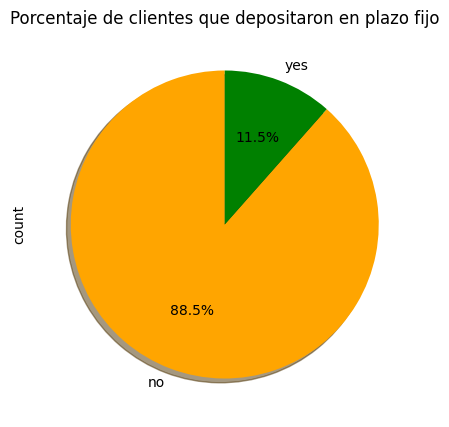

In [ ]:
# Visualizo qué porcentaje de los clientes contactados depositó en plazo fijo, reflejo de la campaña anterior
plt.figure(figsize=(10,5))
mycolors = ["orange", "green"]
df["y"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90 , colors = mycolors, shadow = True)
plt.title("Porcentaje de clientes que depositaron en plazo fijo")
plt.yticks([])
plt.show()

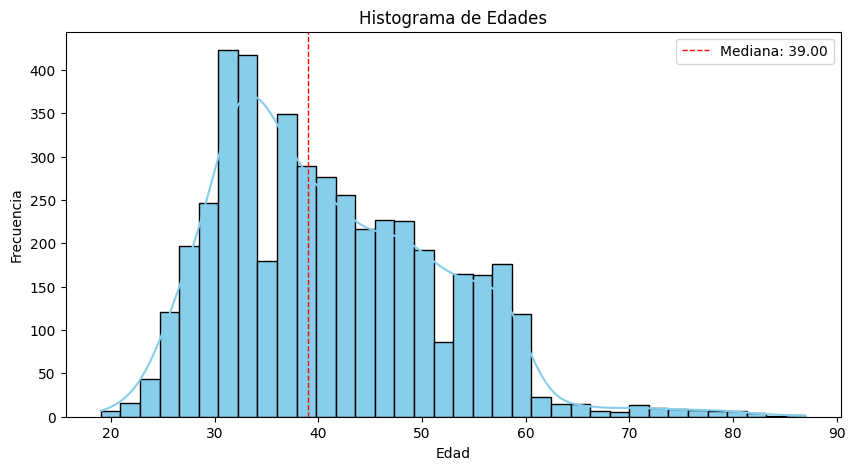

In [ ]:
# Creo un histograma para ver la distribucion de edades de los clientes con la mediana graficada de referencia
median_age = df['age'].median()
plt.figure(figsize=(10,5))
sns.histplot(df['age'], kde=True, edgecolor="black", color="skyblue", alpha=1)
plt.axvline(median_age, color='red', linestyle='dashed', linewidth=1, label=f'Mediana: {median_age:.2f}')
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

A partir del histograma se puede ver que las edades siguen una distribución asimétrica, donde los adultos mayores representan solo una minoría y que podrían haber outliers en las edades más grandes. A continuación, graficaré el boxplot correspondiente para detectarlos.

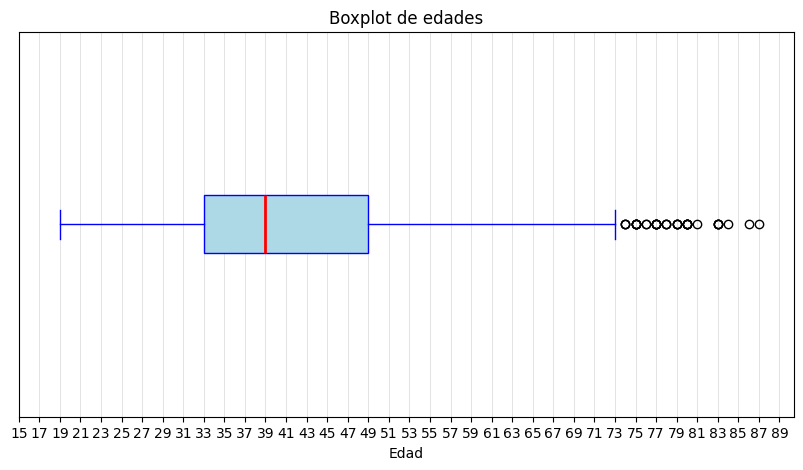

In [ ]:
# Creo un boxplot de las edades para detectar posibles outliers
plt.figure(figsize=(10,5))
plt.boxplot(df['age'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Boxplot de edades')
plt.xlabel('Edad')
major_ticks = np.arange(15, 90, 2)
plt.xticks(major_ticks)
plt.grid(which='major', axis='x', linestyle='-', alpha=0.5, linewidth=0.5)
plt.yticks([])
plt.show()

En el boxplot se pueden identificar varios outliers correspondientes a clientes con edades mayores a 73. Luego hay que definir si estos datos se consideran o no para el modelado ya que van a afectar a los resultados.

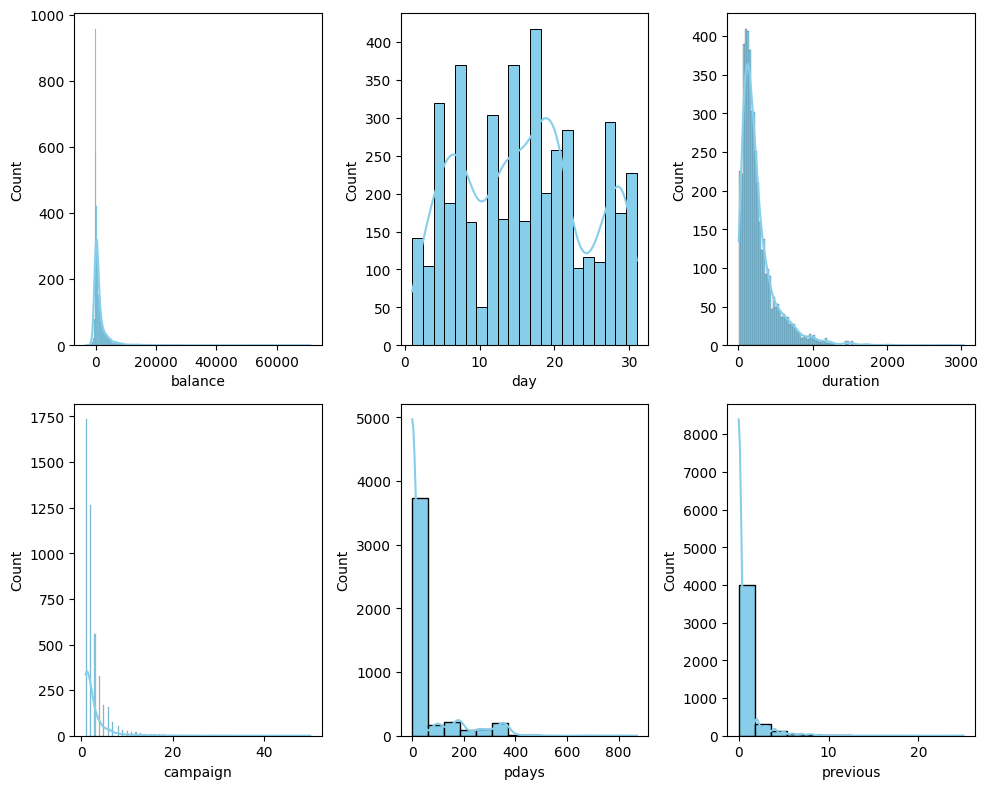

In [ ]:
# Creo una figura con los histogramas de las demás variables cuantitativas para ver su distribución
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
sns.histplot(data=df, x='balance', kde=True, edgecolor="black", color="skyblue", alpha=1, ax=axs[0, 0])
sns.histplot(data=df, x='day', kde=True, edgecolor="black", color="skyblue", alpha=1, ax=axs[0, 1])
sns.histplot(data=df, x='duration', kde=True, edgecolor="black", color="skyblue", alpha=1,  ax=axs[0, 2])
sns.histplot(data=df, x='campaign', kde=True, edgecolor="black", color="skyblue", alpha=1, ax=axs[1, 0])
sns.histplot(data=df, x='pdays', kde=True, edgecolor="black", color="skyblue", alpha=1, ax=axs[1, 1])
sns.histplot(data=df, x='previous',kde=True, edgecolor="black", color="skyblue", alpha=1,  ax=axs[1, 2])
plt.tight_layout()
plt.show()

En todas las variables graficadas excepto day, se observan distribuciones unimodales asimétricas sesgadas a la derecha. El rango de valores observados en el eje x sugiere la presencia de outliers. A continuación, graficaré los boxplots correspondientes para detectarlos.

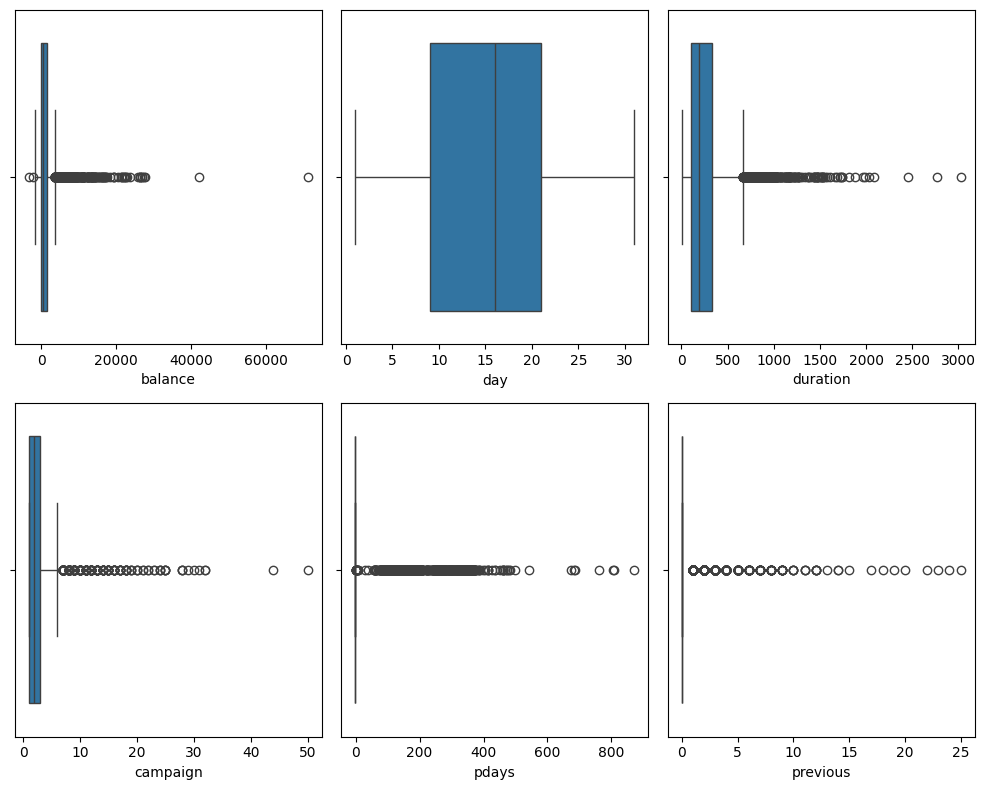

In [ ]:
# Creo una figura con los boxplots de las demás variables cuantitativas para ver su distribución
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
sns.boxplot(data=df, x='balance', ax=axs[0, 0])
sns.boxplot(data=df, x='day', ax=axs[0, 1])
sns.boxplot(data=df, x='duration', ax=axs[0, 2])
sns.boxplot(data=df, x='campaign', ax=axs[1, 0])
sns.boxplot(data=df, x='pdays', ax=axs[1, 1])
sns.boxplot(data=df, x='previous', ax=axs[1, 2])
plt.tight_layout()
plt.show()

Efectivamente las variables balance, duration, campaign, pdays y previous presentan outliers. Habrá que tenerlos en cuenta (o removerlos) a la hora de desarrollar modelos predictivos ya que afectarán a los resultados.

Respecto a posibles correlaciones entre las variables, se cree que la edad de los clientes y su balance podría estar relacionado. Para ello, obtengo el gráfico de dispersión.

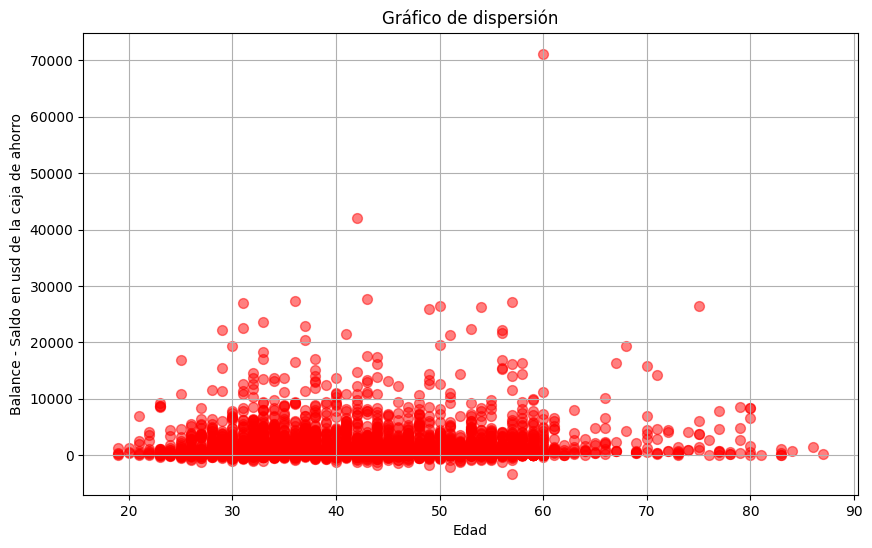

In [ ]:
# Gráfico de dispersión para estudiar relación entre edad y balance
x = df["age"]
y = df["balance"]
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='red', s=50, alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Balance - Saldo en usd de la caja de ahorro')
plt.title('Gráfico de dispersión')
plt.grid(True)
plt.show()

Se puede observar que no hay una correlación alta entre estas variables y se hacen evidentes los outliers detectados anteriormente.

Para tener una idea más general de posibles correlaciones lineales entre las variables numéricas, a continuación se presenta el mapa de calor para la matriz de correlación entre ellas.

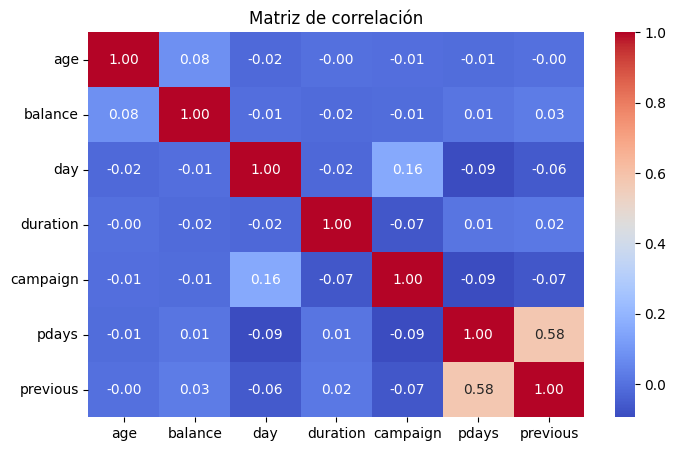

In [ ]:
# Analizo posible correlación lineal entre las variables numéricas
plt.figure(figsize=(8,5))
cor_matrix = df[columnas_numericas].corr()
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

A partir de la matriz de correlación se puede observar que en general no hay correlación lineal entre estas variables o son muy débiles excepto para las variables pdays y previous ya que presentan un coeficiente de Pearson de 0.58, indicando una correlación moderada.

Sin embargo, al ver el gráfico de dispersión de las mismas se puede observar que ese coeficiente fue afectado por la presencia de outliers.

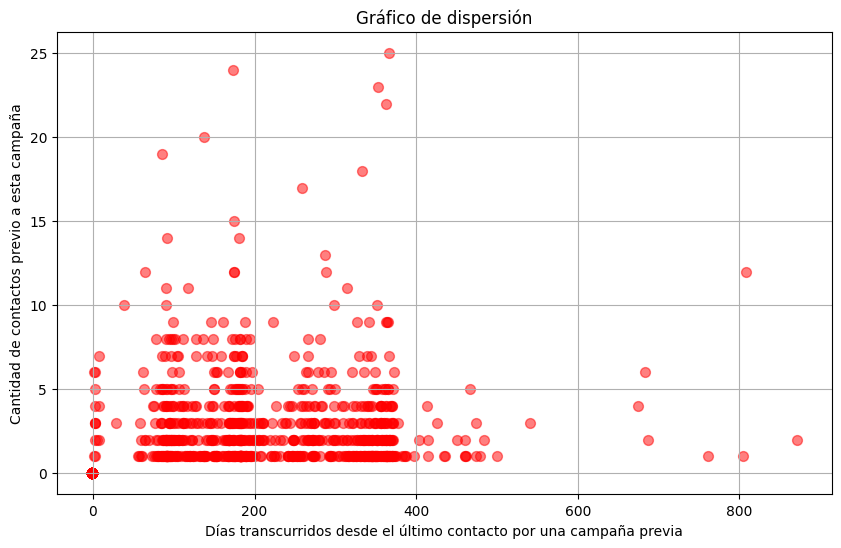

In [ ]:
#Gráficos de dispersión
x = df["pdays"]
y = df["previous"]
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='red', s=50, alpha=0.5)
plt.xlabel('Días transcurridos desde el último contacto por una campaña previa')
plt.ylabel('Cantidad de contactos previo a esta campaña')
plt.title('Gráfico de dispersión')
plt.grid(True)
plt.show()

Para las distintas variables, haré gráficos de barras para diferenciar sus categorias y distinguir entre quienes depositaron el plazo fijo y no con el fin de visualizar alguna posible tendencia.

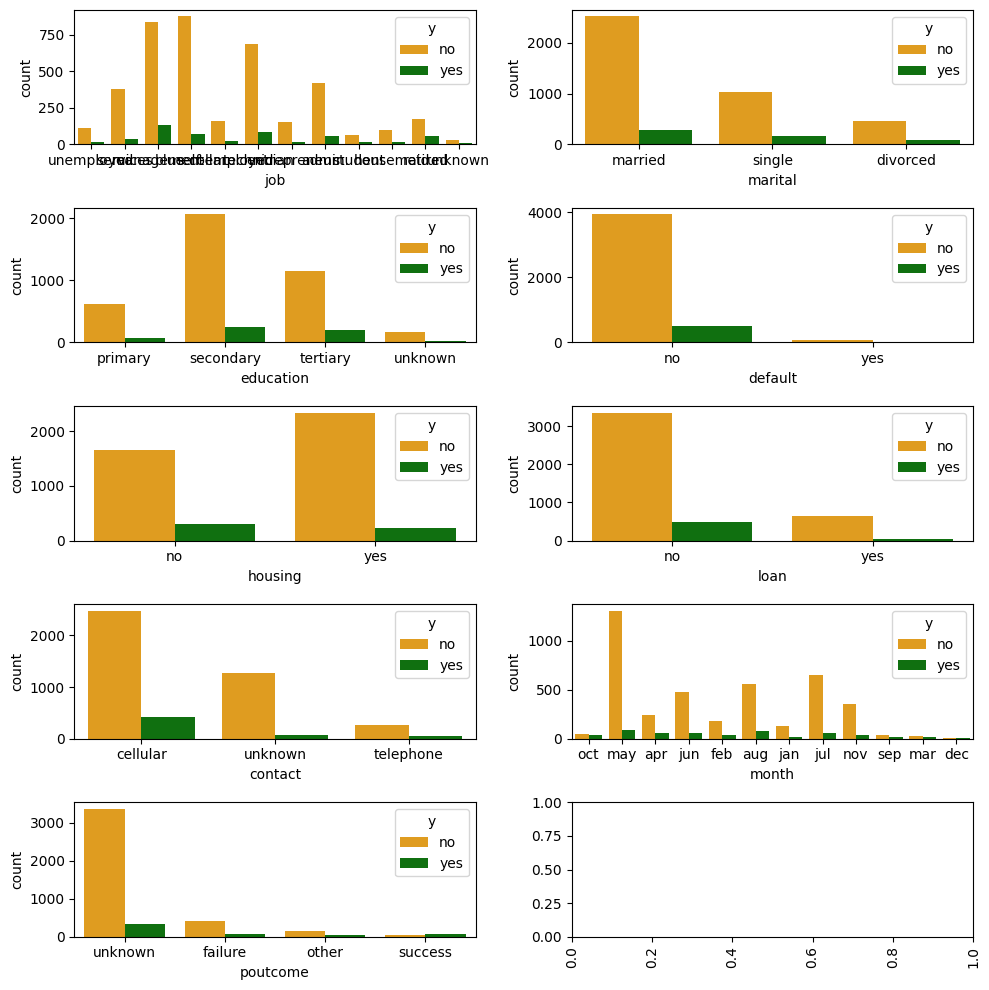

In [ ]:
# Creo una figura con 5 filas y 2 columnas de subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))
custom_palette = {"no": "orange", "yes": "green"}
sns.countplot(data=df, x= 'job', hue="y", palette=custom_palette, ax=axs[0, 0])
plt.xticks(rotation=90)
sns.countplot(data=df, x= 'marital', hue="y", palette=custom_palette, ax=axs[0, 1])
sns.countplot(data=df, x= 'education', hue="y", palette=custom_palette, ax=axs[1, 0])
sns.countplot(data=df, x= 'default', hue="y", palette=custom_palette, ax=axs[1, 1])
sns.countplot(data=df, x= 'housing', hue="y", palette=custom_palette, ax=axs[2, 0])
sns.countplot(data=df, x= 'loan', hue="y", palette=custom_palette, ax=axs[2, 1])
sns.countplot(data=df, x= 'contact', hue="y", palette=custom_palette, ax=axs[3, 0])
sns.countplot(data=df, x= 'month', hue="y", palette=custom_palette, ax=axs[3, 1])
sns.countplot(data=df, x= 'poutcome', hue="y", palette=custom_palette, ax=axs[4, 0])
plt.tight_layout()
plt.show()

A simple vista, estos gráficos no permiten identificar alguna tendencia notoria en cuánto a la distribución de clientes que deciden depositar en plazo fijo.

Sin embargo, teniendo en cuenta que se quiere estudiar la relación entre las distintas variables y el hecho de que el cliente finalmente decida hacer el plazo fijo o no, estos gráficos permiten sostener la hipótesis de que los clientes que tienen algún crédito o préstamo del banco no tienden a invertir en un plazo fijo (observando las variables default, housing y loan).

# Recomendaciones con base en insights observados

El EDA permitió detectar outliers pero no evidenció ninguna clara tendencia entre los valores de las variables y la posterior decisión del cliente. Asimismo, tampoco se observó una correlación fuerte entre algunas de esas variables.
En consecuencia, el modelo a desarrollar no se centró en alguna variable en particular fundamentada en el EDA si no que se comenzó a elaborar en vistas de proveer una herramienta general que permita al banco predecir qué clientes serían potenciales inversores.    

Un punto importante en el análisis y modelo en cuestión es la presencia de outliers en varias de las variables estudiadas. A continuación se presenta una posibilidad para remover outliers relacionados a la edad y podría luego discutirse hacer algo análogo con las demás variables, según cuáles se quieran incluir en el modelo a desarrollar posteriormente.

Cabe destacar de antemano que finalmente en los modelos desarrollados en este trabajo se decidió dejár los outliers para evaluar sus resultados y rendimiento pero que se propone como posible mejoras a futuro desarrollar modelos sin los outliers para intentar optimizar su rendimiento.

In [ ]:
# Elimino clientes que según su edad son outliers ya que afectará al modelo
df_so = df[["age","job","marital","education","default", "balance","housing","loan","contact", "day", "month","duration","campaign", "pdays", "previous", "poutcome","y"]]
#Obs: según el boxplot anterior y haciendo el çalculo Q3+1.5(IQR) hasta 73 no serían outliers.
#Sin embargo, luego a partir de 70.5 aparecen como outliers con lo cual uso 70.
df_so = df[df['age'] <= 70]
df_so_raw = df_so.copy()
df_so.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df_so.shape

(4467, 17)

In [ ]:
df_so.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4467.000000,4467.000000,4467.000000,4467.000000,4467.000000,4467.000000,4467.000000
mean,40.741437,1406.812402,15.911350,262.875084,2.798522,39.558764,0.535259
std,9.880050,2985.710421,8.261578,259.675456,3.118451,100.208061,1.681889
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,66.500000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,440.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,48.000000,1467.000000,21.000000,326.500000,3.000000,-1.000000,0.000000
max,70.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


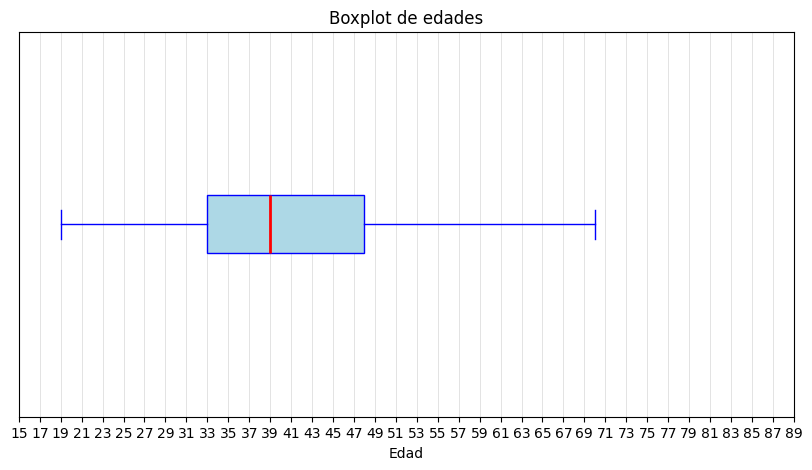

In [ ]:
# Grafico el boxplot de edades para corroborar que removí todos los outliers
plt.figure(figsize=(10,5))
plt.boxplot(df_so['age'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Boxplot de edades')
plt.xlabel('Edad')
major_ticks = np.arange(15, 90, 2)
plt.xticks(major_ticks)
plt.grid(which='major', axis='x', linestyle='-', alpha=0.5, linewidth=0.5)
plt.yticks([])
plt.show()

# Entrenamiento y evaluación de los modelos de clasificación


 Los algoritmos de aprendizaje automático necesitan que los datos sean numéricos para poder procesarlos y aprender de ellos. En consecuencia, se hará la codificación de variables categóricas en variables numéricas en los casos adecuados y se descartarán las variables categóricas de muchas categorías o aquellas donde falte información. Luego se entrenará y evaluará el rendimiento del modelo. En este caso, dado que hay dos posibles resultados (deposita o no deposita en plazo fijo), se trata de un modelo binario.

 Teniendo en cuenta que se quiere estudiar la relación entre las variables y el hecho de que el cliente finalmente decida hacer el plazo fijo o no, no se considerarán para el entrenamiento las variables default, housing y loan ya que de antemano sería esperable que clientes que tienen algún crédito o préstamo del banco no tiendan a invertir en un plazo fijo.

In [ ]:
#Elimino columnas default, housing y loan.
to_drop = ["default", "housing", "loan"]
df = df.drop(columns=to_drop)

In [ ]:
#Cambio nombre de la variable 'y' en el dataframe a 'deposit' para no confundir con la variable 'y' a predecir del modelo.
df.rename({'y': 'deposit'}, axis=1, inplace=True)
df

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,1787,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,4789,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,1350,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,1476,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,-333,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,-3313,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,295,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,1137,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df.job.unique() # Tiene muchas clases, por el momento no voy a incluir esta variable en el modelo

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

En una primera etapa, voy a armar el modelo en torno a las variables "marital" y "contact" para este trabajo. No bostante, luego se podría hacer un procesamiento análogo para obtener un modelo considerando las demás variables.

In [ ]:
to_drop = ["job", "education", "month", "poutcome"]
df = df.drop(columns=to_drop)

In [ ]:
# Definimos nuestras variables X e y para entrenar el modelo
X = df.drop("deposit", axis=1).copy()
y = df.deposit.copy()

In [ ]:
y.unique()

array(['no', 'yes'], dtype=object)

Para armar el modelo, es importante en primer lugar chequear si los porcentajes que hay de cada clase de la variable a predecir (aqui 'y') están balanceadas.


In [ ]:
y.value_counts(normalize=True)*100

,proportion
deposit,
no,88.476001
yes,11.523999


Por lo general se consideran aceptales porcentajes rondando 80%-20% o diferencias menores. En este caso, la diferencia es un poco mayor pero de todas formas continuaré con este modelo y analizaré su rendimiento.

## Modelo de árbol de decisión (Decision Tree Classifier)

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en sets de entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Fijo la semilla (42) para que cuando tome una muestra de los datos siempre caiga en los mismos conjuntos.

In [ ]:
#Veo el X_train y corroboro que tengo el 70% de los datos que tenía en total
X_train

,age,marital,balance,contact,day,duration,campaign,pdays,previous
1244,37,single,1467,cellular,17,349,1,-1,0
3359,25,single,34,unknown,4,316,1,-1,0
2983,53,married,1278,telephone,15,174,3,-1,0
4279,31,married,-6,telephone,7,94,2,-1,0
4023,43,married,3529,cellular,5,169,2,-1,0
...,...,...,...,...,...,...,...,...,...
4327,55,divorced,653,unknown,6,800,1,-1,0
1205,39,married,0,cellular,2,731,1,193,3
4095,35,married,0,cellular,14,125,2,-1,0
4335,37,single,105,unknown,17,260,4,-1,0


In [ ]:
y_train

,deposit
1244,no
3359,no
2983,no
4279,no
4023,no
...,...
4327,no
1205,no
4095,no
4335,no


In [ ]:
# Corroboro que el porcentaje de distribución de la variable 'y' para el entrenamiento y test siga respetando la original
y.value_counts(normalize=True)*100

,proportion
deposit,
no,88.476001
yes,11.523999


In [ ]:
y_train.value_counts(normalize=True)*100

,proportion
deposit,
no,88.46397
yes,11.53603


In [ ]:
y_test.value_counts(normalize=True)*100

,proportion
deposit,
no,88.504053
yes,11.495947


Codificación de variables categórica:
Para variables como marital y contact utilizaré one hot encoding.
Para variables ordinales (expresan con palabras una cualidad de naturaleza ordenabl) usaría label encoder.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False).fit(X_train[["marital", "contact"]])

In [ ]:
encoded = ohe.transform(X_train[["marital", "contact"]])
encoded_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded, index=X_train.index)
encoded_df

,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
1244,0.0,0.0,1.0,1.0,0.0,0.0
3359,0.0,0.0,1.0,0.0,0.0,1.0
2983,0.0,1.0,0.0,0.0,1.0,0.0
4279,0.0,1.0,0.0,0.0,1.0,0.0
4023,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
4327,1.0,0.0,0.0,0.0,0.0,1.0
1205,0.0,1.0,0.0,1.0,0.0,0.0
4095,0.0,1.0,0.0,1.0,0.0,0.0
4335,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_train = pd.concat([X_train, encoded_df], axis="columns")

In [ ]:
#Repito lo mismo con los de test para que las columnas queden igual que etrenamiento
encoded_test = ohe.transform(X_test[["marital", "contact"]])
encoded_df_test = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded_test, index=X_test.index)
X_test = pd.concat([X_test, encoded_df_test], axis="columns")

In [ ]:
X_train = X_train.drop(["marital", "contact"], axis=1)
X_test = X_test.drop(["marital", "contact"], axis=1)

In [ ]:
reglas = {"yes": 1, "no": 0}

y_train = y_train.map(reglas)
y_test = y_test.map(reglas)

In [ ]:
y_train

,deposit
1244,0
3359,0
2983,0
4279,0
4023,0
...,...
4327,0
1205,0
4095,0
4335,0


In [ ]:
y_test

,deposit
4520,0
1814,0
2671,0
621,0
1813,0
...,...
1676,0
3961,1
1273,0
2844,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(max_depth=10, random_state=42).fit(X_train, y_train)

In [ ]:
# Quiero predecir si un cliente deposita o no según mi modelo, probando con los datos de entrenamiento y con los de test.
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [ ]:
# Comparo visualmente algunas predicciones con los datos y veo que son correctas
train_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Comparo visualmente algunas predicciones con los datos y veo que son correctas
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report

# Visualizo el reporte de clasificación para evaluar el modelo tanto con el set de entrenamiento como con el de evaluación
print("Training")
print(classification_report(y_train, train_pred))
print("----------------------------------------------------")
print("Testing")
print(classification_report(y_test, test_pred))

Training
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2799
           1       0.95      0.73      0.83       365

    accuracy                           0.97      3164
   macro avg       0.96      0.86      0.91      3164
weighted avg       0.96      0.97      0.96      3164

----------------------------------------------------
Testing
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1201
           1       0.44      0.31      0.37       156

    accuracy                           0.88      1357
   macro avg       0.68      0.63      0.65      1357
weighted avg       0.86      0.88      0.87      1357



Considerando los valores de accuracy obtenidos:

Para training (0.97) se observa que 97% de las predicciones (sobre los datos conocidos del set de training) fueron correctas.

Para testing (0.88) se observa que el 88% de las predicciones (sobre los datos desconocidos del set de testing) fueron correctas.

Por un lado, se cumple que la accuracy del set de testing es menor al set de training, y la diferencia no es demasiado grande.

Por otra parte, a partir del dataset original se sabía que la clase mayoritaria era que el cliente no deposite en plazo fijo y tenía una probabilidad de 88%. Entonces podemos usar este porcentaje como punto de referencia para evaluar el modelo obtenido. En consecuencia, en este caso el modelo funciona igual o mejor que el azar.

En este caso nos centramos en los reportes de clasificación para evaluar el modelo. Sin embargo, otra métrica posible para evaluar el rendimiento del modelo es la curva AUC-ROC, cuyo valor resultado (el area bajo la curva) proporciona una referencia rápida.

In [ ]:
#Curva ROC
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,test_pred)
metrics.auc(fpr,tpr)

0.6312394585708491

Cuando el AUC se acerca a 1, el modelo muestra un alto rendimiento, en torno a 0,5 manifiesta que el modelo no obtiene mejores resultados que el azar y si es cercano a 0 indica que el modelo se equivoca. En este caso, el valor alrededor de 0,6 estaría indicando que el modelo falla en ser mejor que el azar, lo cual sería una contradicción con lo obtenido anteriormente y habrían que revisar.

## Modelo KNN (K-Nearest Neighbors)

Por otro lado, podemos hacer lo mismo con KNN (K-Nearest Neighbors) pero para ello hay que escalar los datos primero para no sesgar los resultados por las mismas escalas de los datos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.26470588, 0.10538384, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.08823529, 0.07379073, 0.1       , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.10121698, 0.46666667, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.23529412, 0.07304114, 0.43333333, ..., 1.        , 0.        ,
        0.        ],
       [0.26470588, 0.07535606, 0.53333333, ..., 0.        , 0.        ,
        1.        ],
       [0.64705882, 0.08349134, 0.8       , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
# Asumiendo un valor de 5, podríamos usar otros y afecta al rendimiento del modelo

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
train_pred = knn.predict(X_train_scaled)
test_pred = knn.predict(X_test_scaled)

In [ ]:
print("Training")
print(classification_report(y_train, train_pred))
print("----------------------------------------------------")
print("Testing")
print(classification_report(y_test, test_pred))

Training
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2799
           1       0.76      0.28      0.41       365

    accuracy                           0.91      3164
   macro avg       0.84      0.63      0.68      3164
weighted avg       0.90      0.91      0.89      3164

----------------------------------------------------
Testing
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1201
           1       0.54      0.17      0.26       156

    accuracy                           0.89      1357
   macro avg       0.72      0.58      0.60      1357
weighted avg       0.86      0.89      0.86      1357



Considerando los valores de accuracy obtenidos para este modelo se pueden observar resultados muy similares a los obtenidos con el árbol de decisión ya que:

Para training (0.91) se observa que 91% de las predicciones (sobre los datos conocidos del set de training) fueron correctas.

Para testing (0.89) se observa que el 89% de las predicciones (sobre los datos desconocidos del set de testing) fueron correctas.

Por un lado, se cumple que la accuracy del set de testing es menor al set de training, y la diferencia no es demasiado grande.

Por otra parte, a partir del dataset original se sabía que la clase mayoritaria era que el cliente no deposite en plazo fijo y tenía una probabilidad de 88%. Entonces podemos usar este porcentaje como punto de referencia para evaluar el modelo obtenido. En consecuencia, en este caso el modelo funciona igual o mejor que el azar.

# Conclusiones

En una primera etapa, a través del EDA se analizaron y visualizaron las distintas variables relacionadas a los clientes que deciden depositar o no sus ahorros en un plazo fijo. Esto permitió detectar outliers pero no se vio ninguna clara tendencia entre los valores de las variables y la posterior decisión del cliente. Adicionalmente, se estudiaron las posibles correlaciones entre las variables pero no se observó ninguna correlación fuerte entre ellas.    

En segundo lugar, se desarrollaron dos modelos de clasificación, uno de árbol de decisión y otro de KNN, teniendo en cuenta las variables marital y contact. En ambos casos los valores de accuracy obtenidos en las métricas reflejaron un buen rendimiento por lo cual se considera importante profundizar estos modelos incorporando las demás variables para poder brindarle al banco una mejor herramienta de predicción.

Como conclusión general, se recomienda al banco utilizar estos modelos para reforzar sus campañas en aquellos clientes propensos a invertir en plazo fijo, así como para llevar a cabo campañas de marketing mejor dirigidas a aquellos que en principio no serían claros inversores.
    